In [3]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from  TCGA_files import queryFile
from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML

In [4]:
cases_endpt = 'https://api.gdc.cancer.gov/cases'
fields = [
    "submitter_id",
    "case_id",
    "primary_site",
    "disease_type",
    "diagnoses.tumor_stage",
    "diagnoses.tumor_grade",
    "diagnoses.primary_diagnosis",
    "diagnoses.classification_of_tumor",
    "annotations.classification",
    "samples.tumor_code"
    ]
fields = ','.join(fields)

# query file

See https://docs.gdc.cancer.gov/API/Users_Guide/Appendix_A_Available_Fields/#file-fields for possible *fields*

In [5]:
queryFile('007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz')

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz


,samples.0.tumor_code,disease_type,samples.1.tumor_code,submitter_id,diagnoses.0.classification_of_tumor,case_id,primary_site,diagnoses.0.tumor_grade,diagnoses.0.primary_diagnosis,diagnoses.0.tumor_stage,id
0,,Complex Mixed and Stromal Neoplasms,,TCGA-NA-A4QV,not reported,cdde118f-4673-4e7e-b965-1f9fe007050d,"Uterus, NOS",not reported,"Carcinosarcoma, NOS",not reported,cdde118f-4673-4e7e-b965-1f9fe007050d


## query many

In [4]:
files = []

In [6]:
def queryFiles(files):
    df = pd.DataFrame(columns=fields.split(','))
    for i,f  in enumerate(files):
        df = df.append(queryFile(f), ignore_index=True)
    #print(df.head())
    return df

In [7]:
def makePie(df, level, c, whatToLookFor = ['disease_type']):
    fig = plt.figure(figsize=(60,15))
    ax = fig.subplots(1, len(whatToLookFor))
    for i,lookFor in enumerate(whatToLookFor):
        datatotestarr = df[lookFor].values
        utype, counts = np.unique(datatotestarr, return_counts=True)
        total = len(datatotestarr)
        try:
            labels = ['\n'.join(wrap(str(l), 20)) for l in utype]
        except:
            labels = utype
        ax[i].set_title(lookFor, fontsize=44)
        patches, texts, autotexts = ax[i].pie(counts, 
                                              labels=labels, 
                                              autopct=lambda(p): '#:%.0f'%(p * total / 100), 
                                              textprops={'fontsize':30, 'color':'white', 'wrap':True})
        for t in texts:
            t.set_fontsize(24)
            t.set_wrap(True)
            t.set_color('black')
    fig.savefig("cluster_pie_level_%d_cluster_%d.png"%(level, c))

In [9]:
cluster = {0: [('007f49fe-d251-4ae4-9313-86d765b13499', 1.0)],
 1: [('009ff7e3-8bd3-4683-adf5-7b68a0859f35', 1.0)],
 2: [('e2189723-f7a8-4117-b9b1-e5b34eb47021', 1.0),
  ('00e2c524-8a29-46d7-bf88-ed5f9c3dcf32', 1.0)],
 3: [('00eb7c26-84fd-4ab9-93a1-3d209dfc0f43', 1.0)],
 4: [('01188815-3676-4980-9cb8-7666169328f1', 1.0)],
 5: [('fcc54ed3-5ba9-461f-a3a5-72b8eb89e4da', 1.0),
  ('01521666-f595-4074-aea1-f7ab78db062b', 1.0)],
 6: [('d946a385-bf7e-4e8c-a371-fa4756762054', 1.0),
  ('01770ca7-0c13-4078-b956-a35dc68fbe28', 1.0)],
 7: [('01ed42c5-175d-4de0-a379-417f950113f6', 1.0)],
 8: [('020a0264-e1d5-4957-9abf-df6983845b8a', 1.0)]}

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz


/Users/filippo/anaconda3/envs/thesis/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


quering...009ff7e3-8bd3-4683-adf5-7b68a0859f35.FPKM.txt.gz
quering...e2189723-f7a8-4117-b9b1-e5b34eb47021.FPKM.txt.gz
quering...00e2c524-8a29-46d7-bf88-ed5f9c3dcf32.FPKM.txt.gz
quering...00eb7c26-84fd-4ab9-93a1-3d209dfc0f43.FPKM.txt.gz
quering...01188815-3676-4980-9cb8-7666169328f1.FPKM.txt.gz
quering...fcc54ed3-5ba9-461f-a3a5-72b8eb89e4da.FPKM.txt.gz
quering...01521666-f595-4074-aea1-f7ab78db062b.FPKM.txt.gz
quering...d946a385-bf7e-4e8c-a371-fa4756762054.FPKM.txt.gz
quering...01770ca7-0c13-4078-b956-a35dc68fbe28.FPKM.txt.gz
quering...01ed42c5-175d-4de0-a379-417f950113f6.FPKM.txt.gz
quering...020a0264-e1d5-4957-9abf-df6983845b8a.FPKM.txt.gz


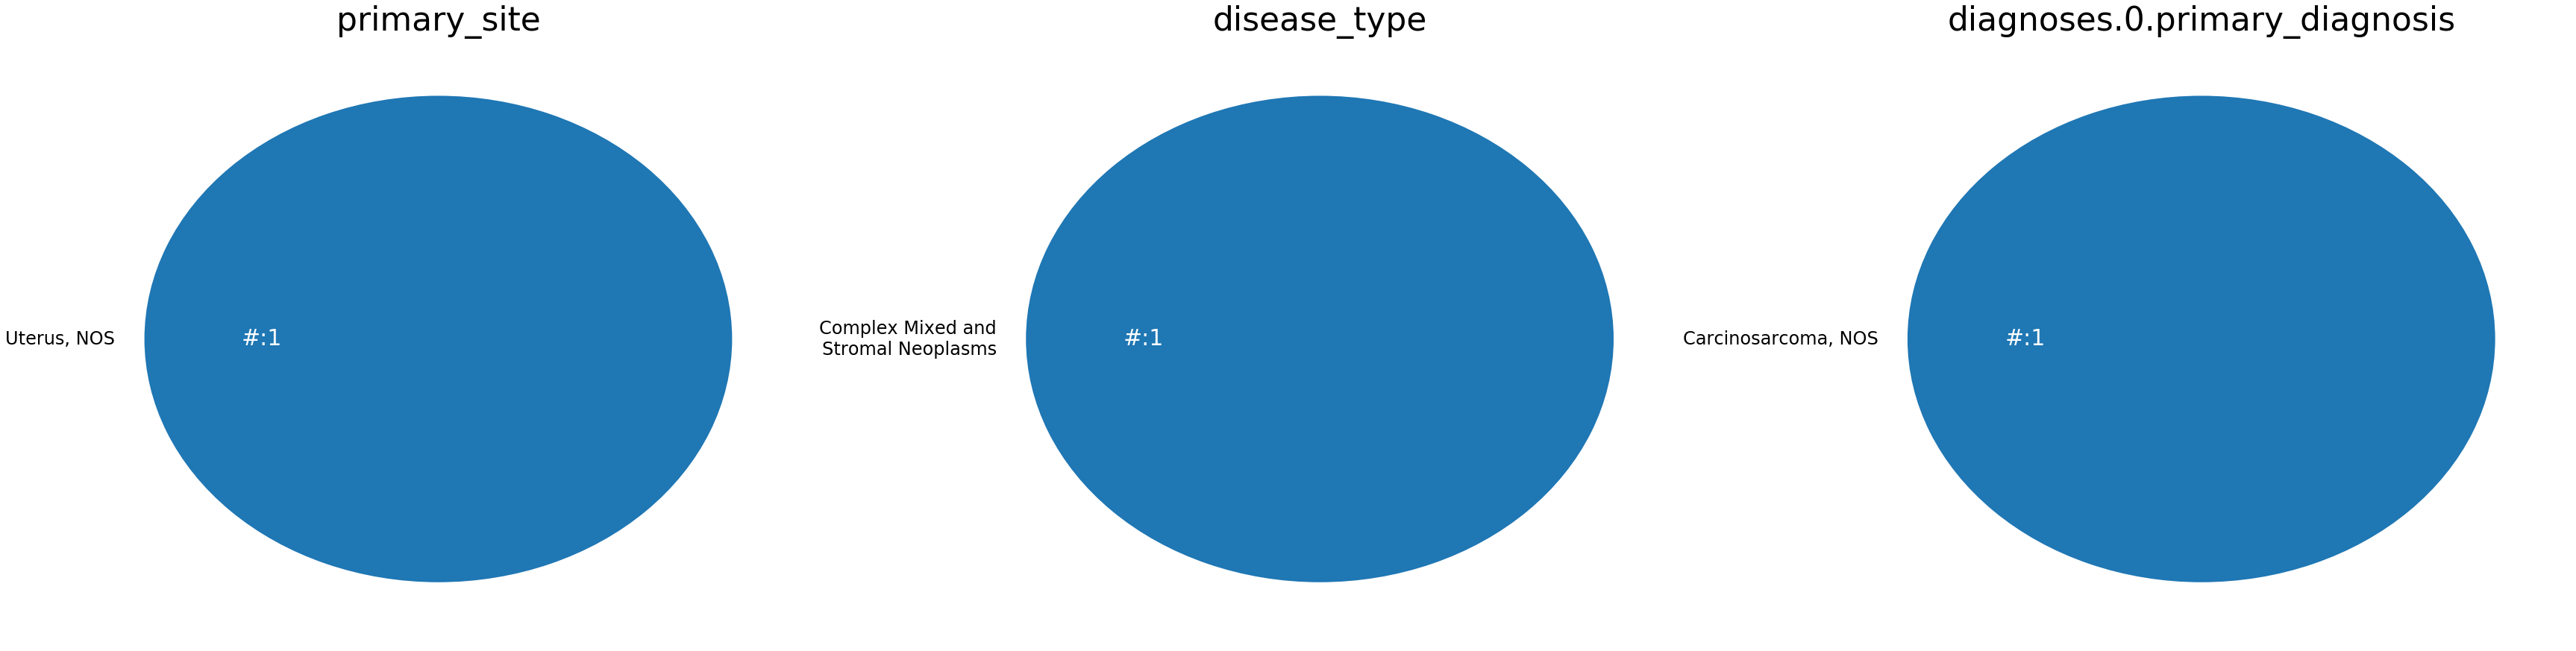

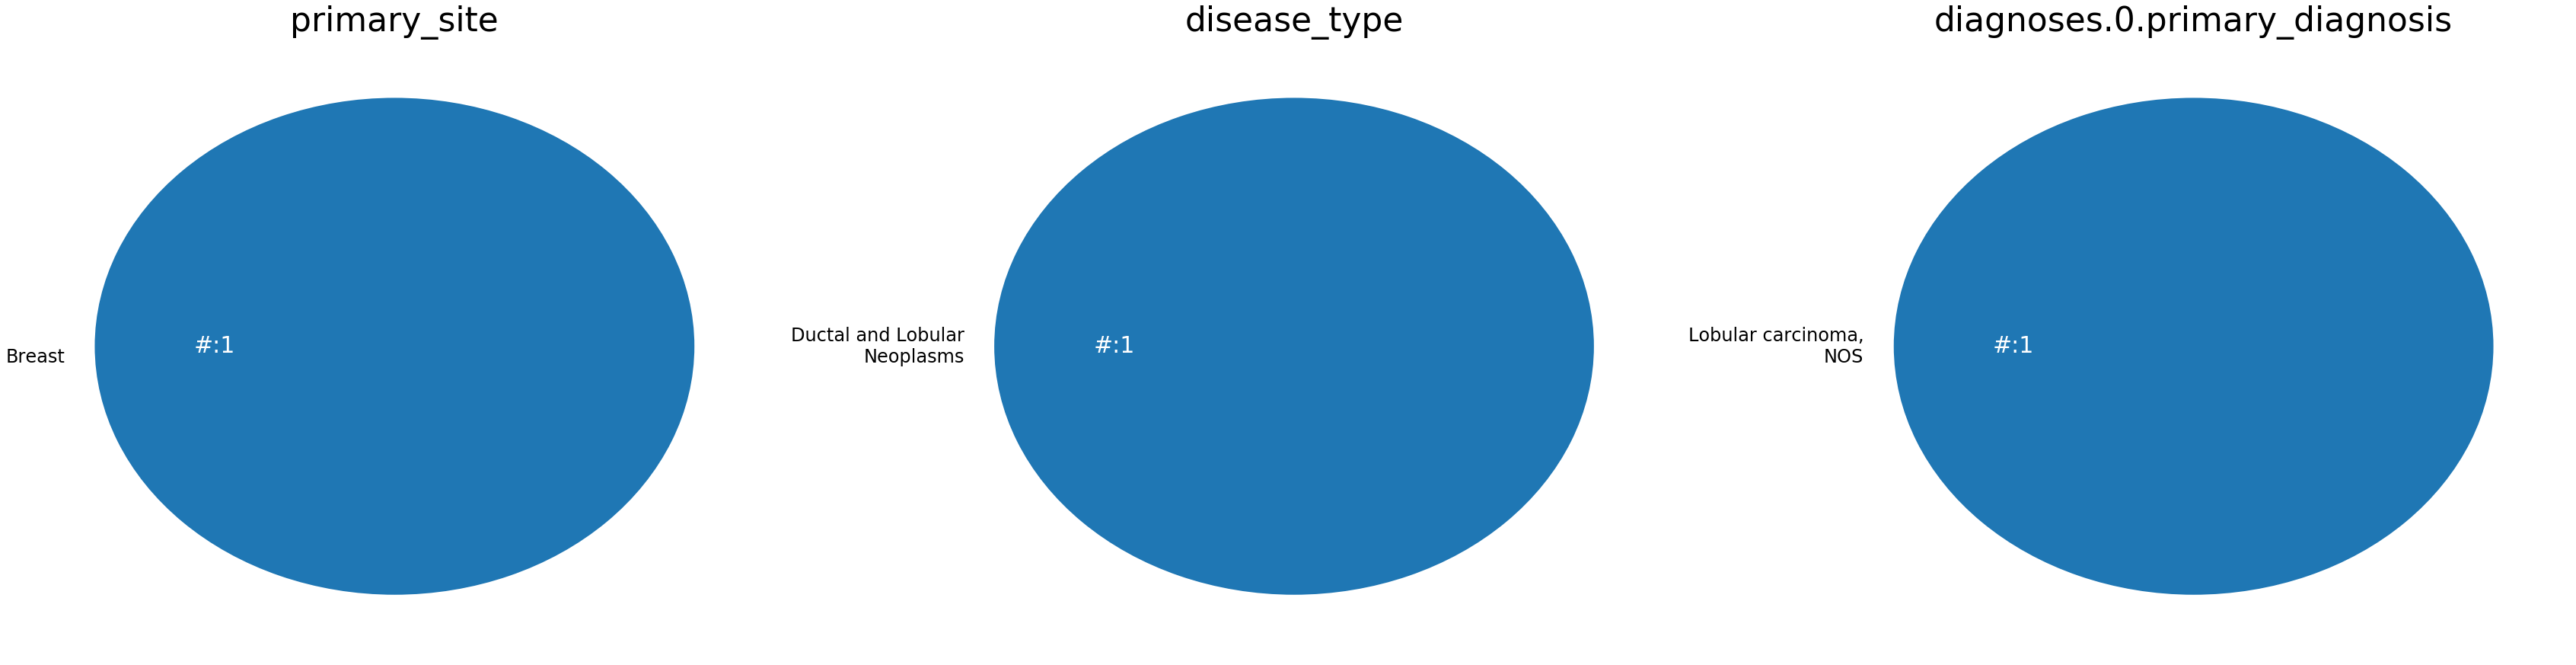

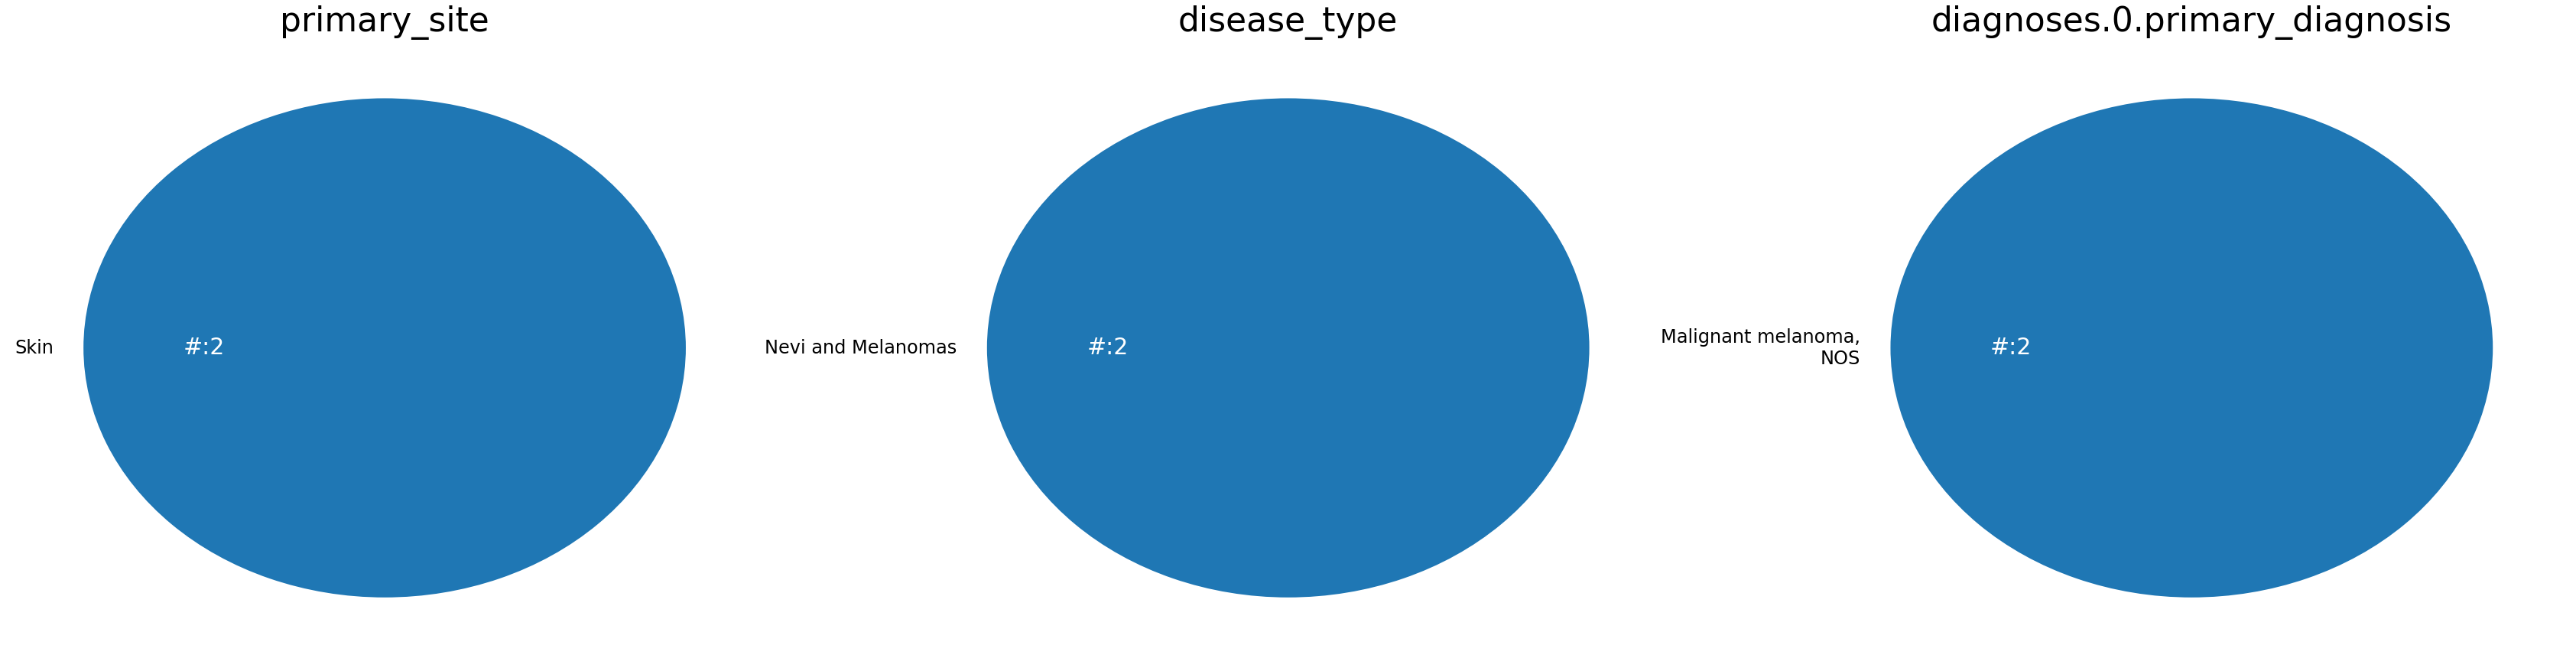

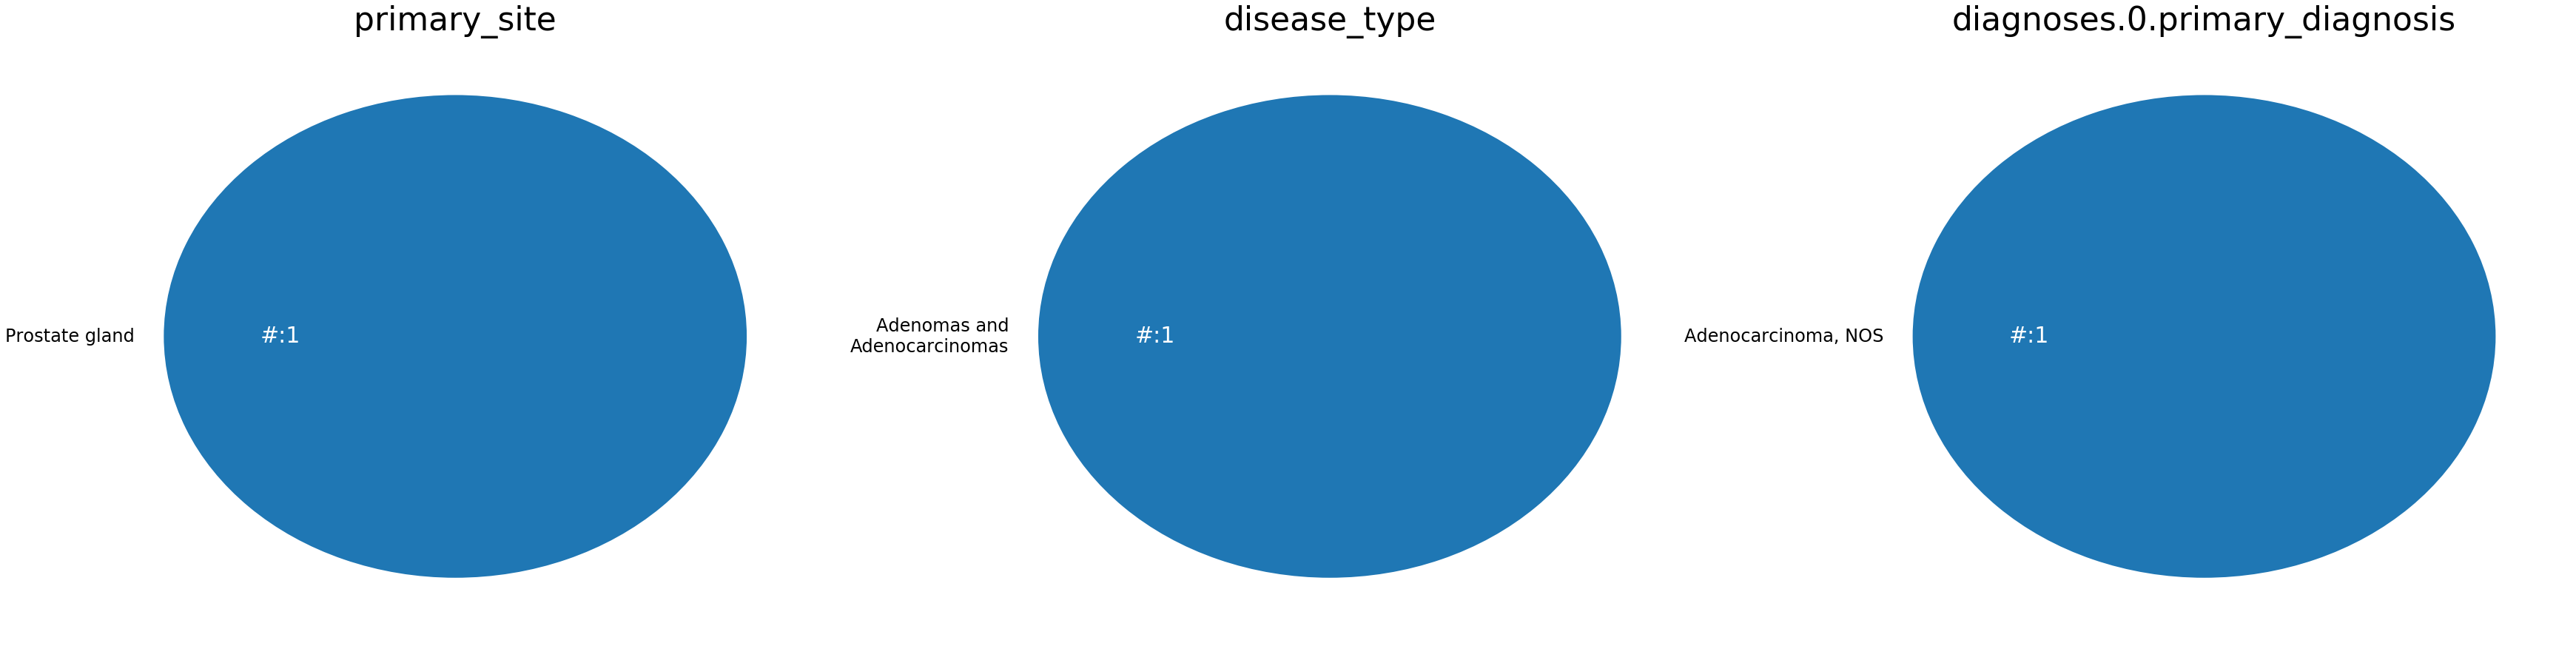

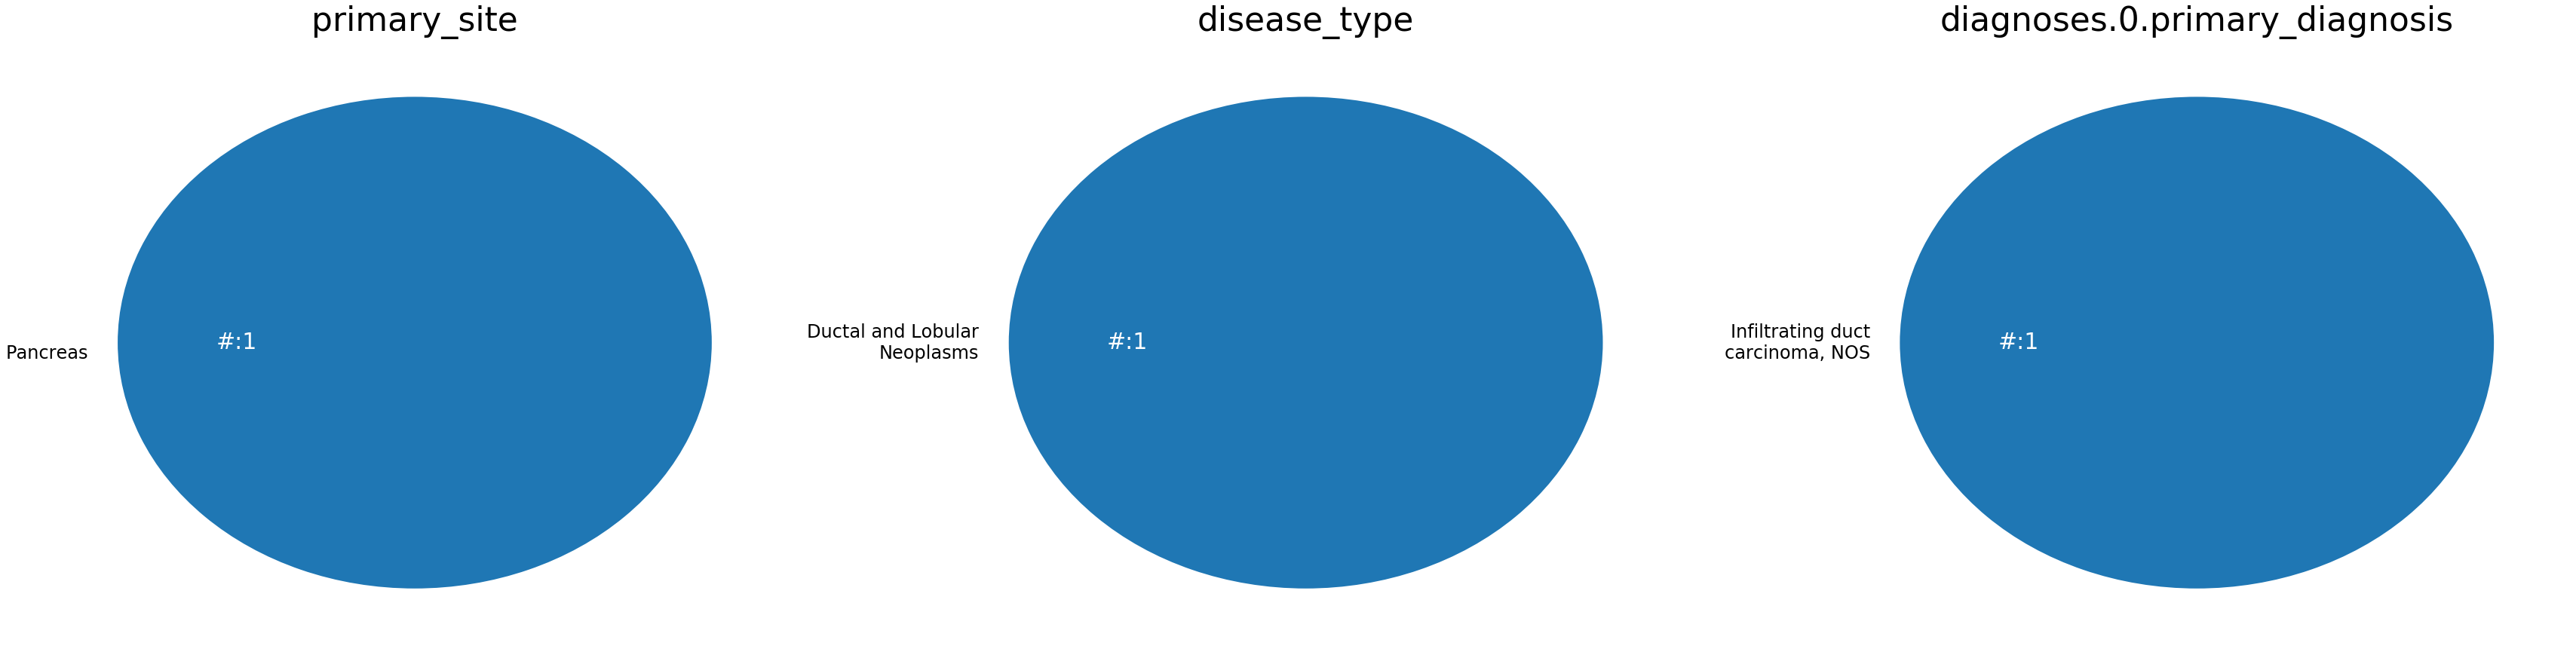

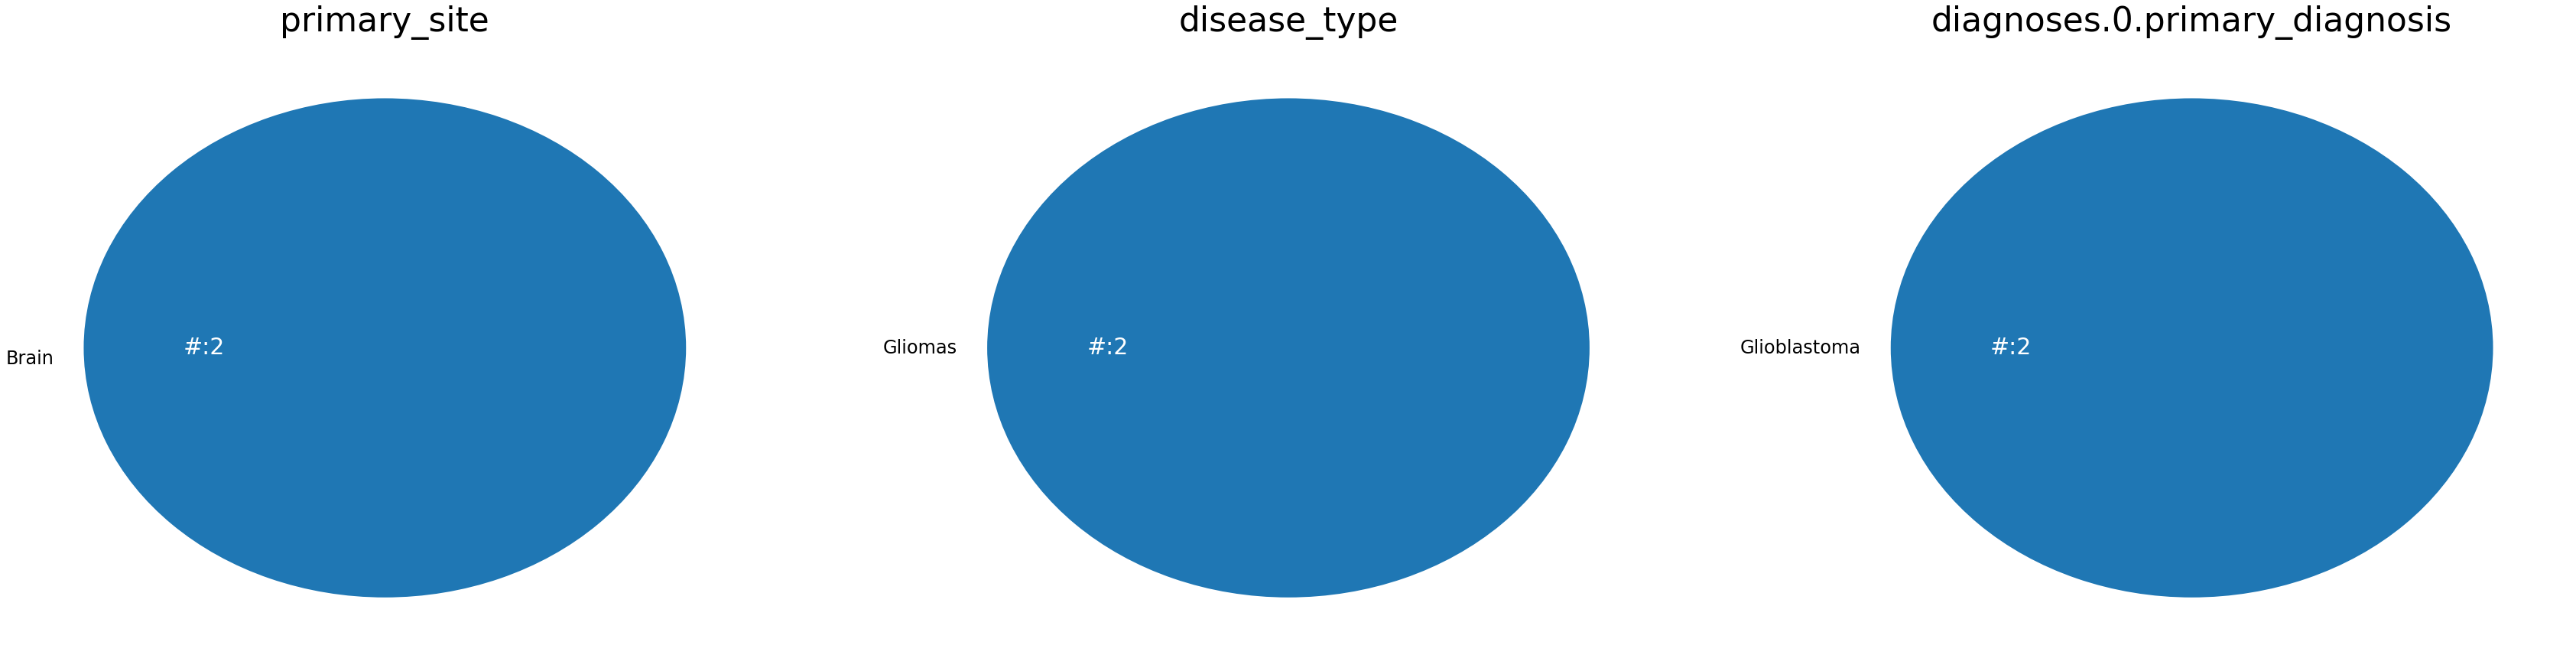

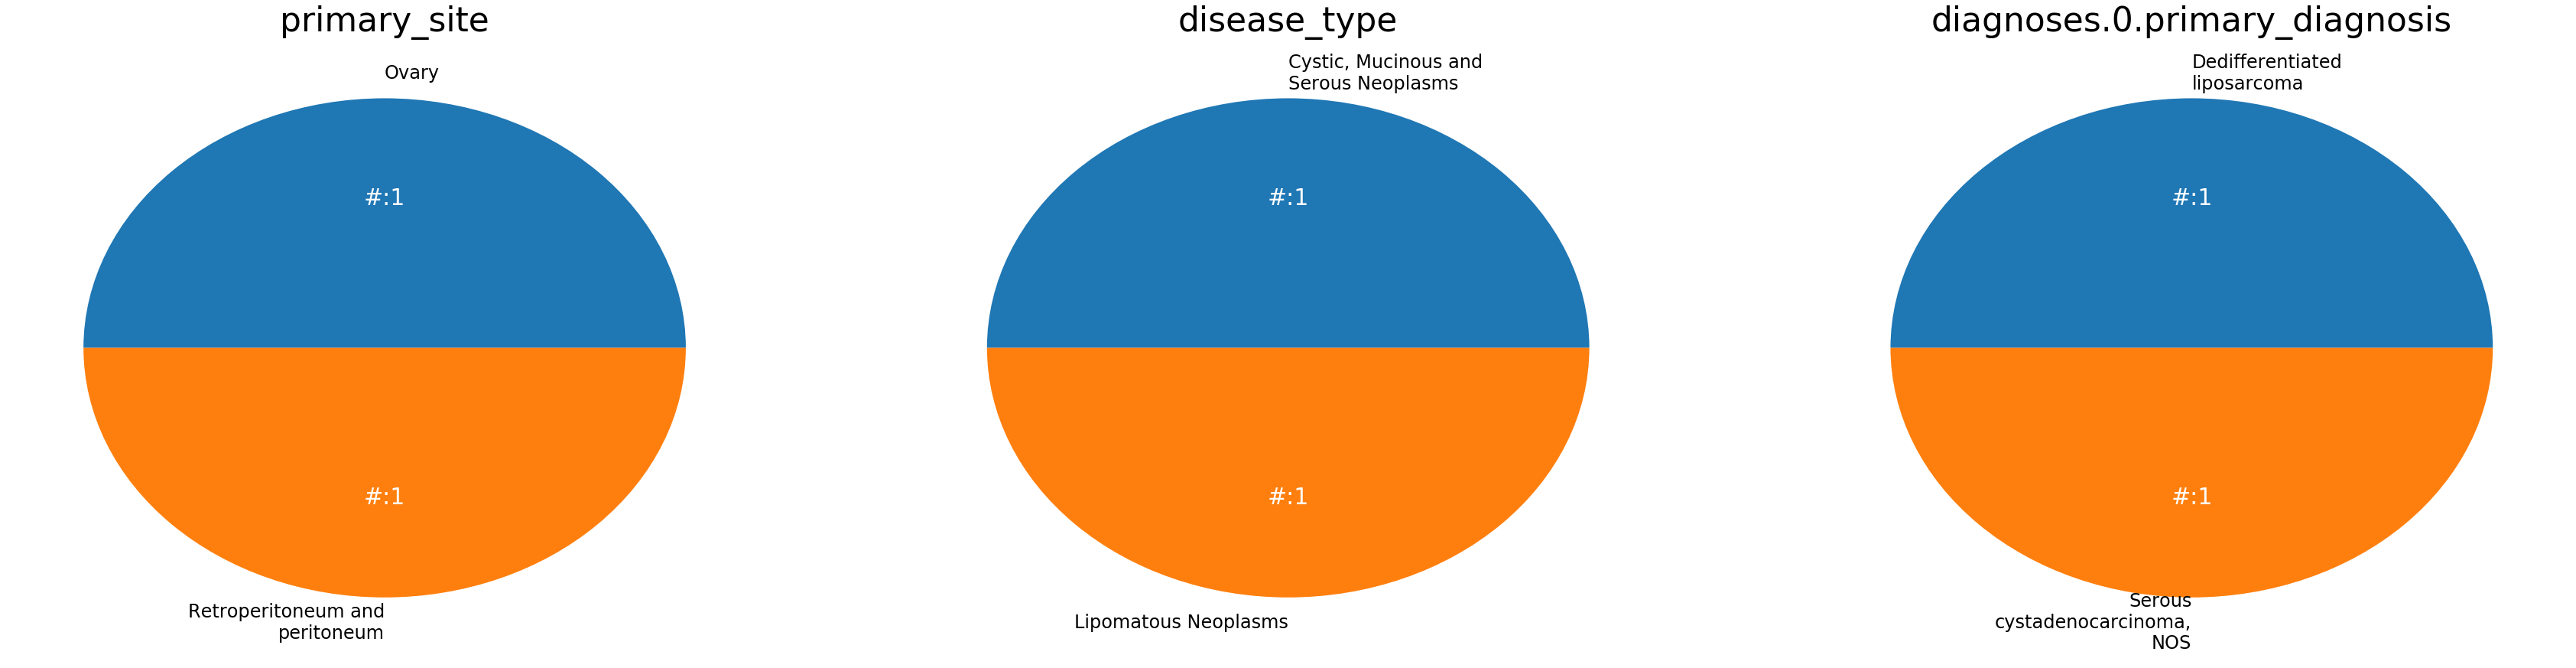

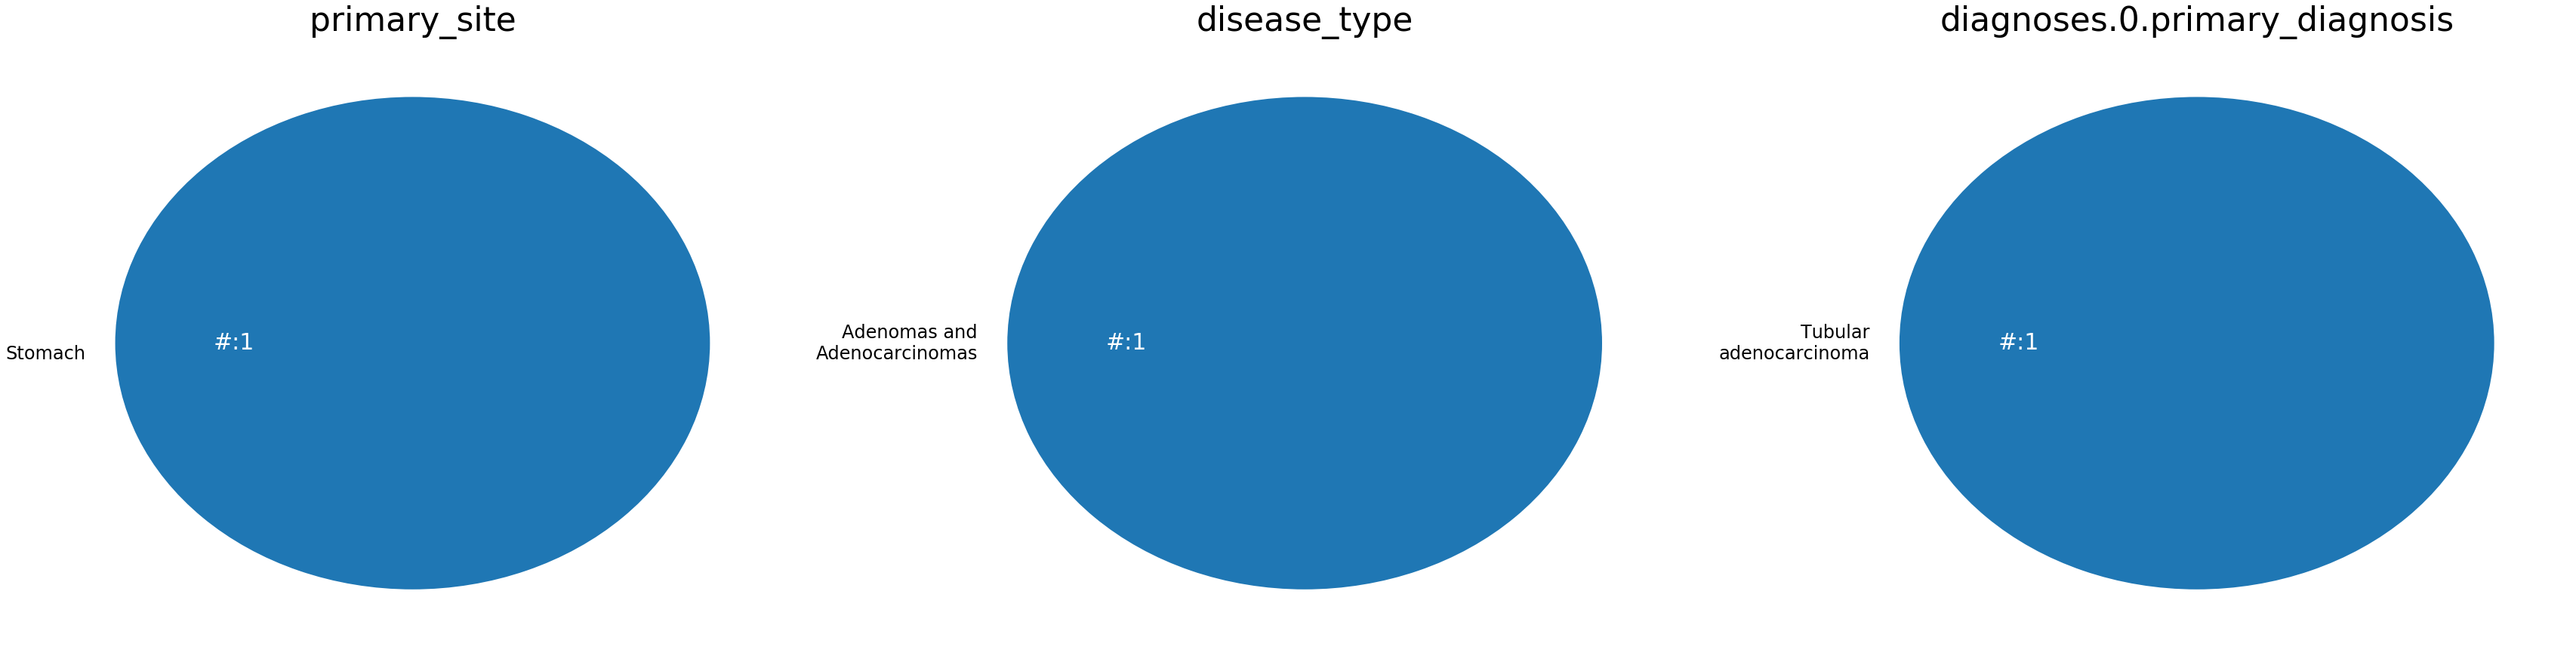

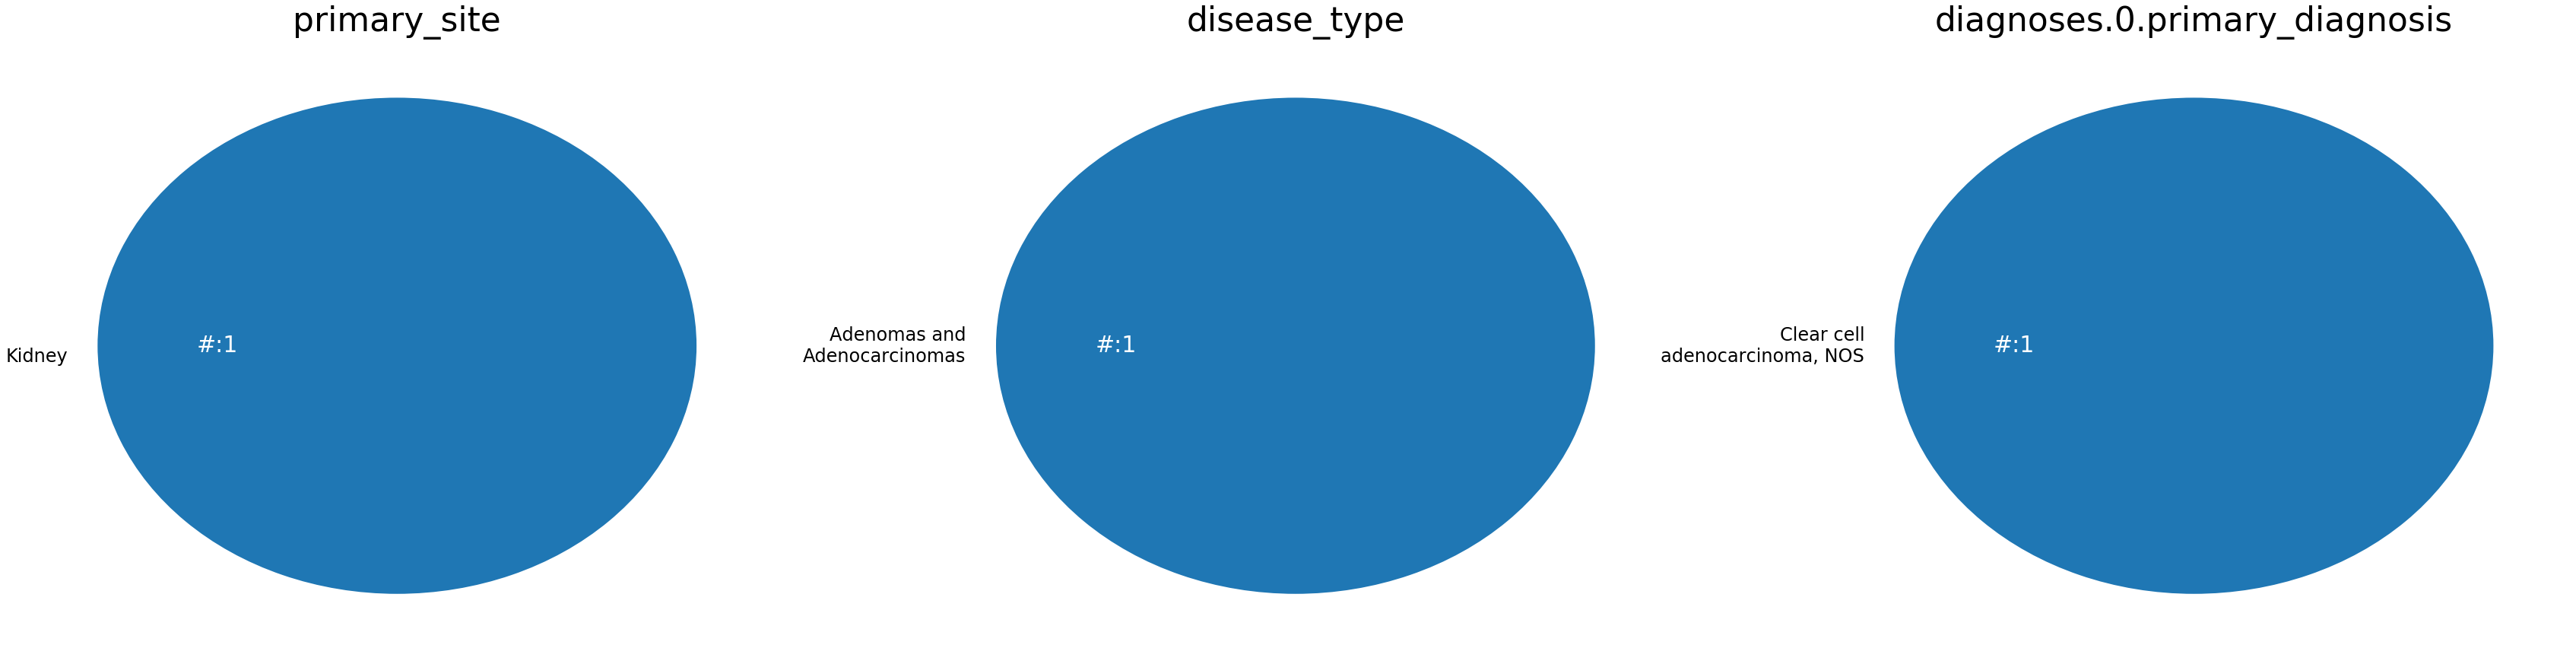

In [10]:
level = 0
for c in cluster:
    datatotest = queryFiles([f[0][:]+".FPKM.txt.gz" for f in cluster[c]])
    makePie(datatotest, level, c, ['primary_site','disease_type','diagnoses.0.primary_diagnosis'])

# Words
## query words

In [9]:
cluster = [('ENSG00000123407', 0.07976071784646062),
  ('ENSG00000089116', 0.06081754735792622),
  ('ENSG00000185742', 0.05284147557328016),
  ('ENSG00000269586', 0.05284147557328016),
  ('ENSG00000142224', 0.04885343968095713),
  ('ENSG00000181433', 0.04885343968095713),
  ('ENSG00000124092', 0.047856430707876374),
  ('ENSG00000217236', 0.04287138584247258),
  ('ENSG00000147246', 0.03988035892323031),
  ('ENSG00000133454', 0.03489531405782652),
  ('ENSG00000237412', 0.03290129611166501),
  ('ENSG00000004809', 0.031904287138584245),
  ('ENSG00000167419', 0.028913260219341975),
  ('ENSG00000115665', 0.027916251246261216),
  ('ENSG00000268940', 0.026919242273180457),
  ('ENSG00000165702', 0.022931206380857428),
  ('ENSG00000242550', 0.02193419740777667),
  ('ENSG00000163206', 0.02193419740777667),
  ('ENSG00000261949', 0.020937188434695914),
('ENSG00000156150', 0.020937188434695914)]

In [10]:
genesinfo([c[0] for c in cluster])

querying 1-20...done.
ENSG00000123407 [HOXC12]
Descr: homeobox C12
ENSG00000089116 [LHX5]
Descr: LIM homeobox 5
ENSG00000185742 [C11orf87]
Descr: chromosome 11 open reading frame 87
ENSG00000269586 [CT45A10]
Descr: cancer/testis antigen family 45 member A10
ENSG00000142224 [IL19]
Descr: interleukin 19
ENSG00000181433 [SAGE1]
Descr: sarcoma antigen 1
ENSG00000124092 [CTCFL]
Descr: CCCTC-binding factor like
ENSG00000217236 [SP9]
Descr: Sp9 transcription factor
ENSG00000147246 [HTR2C]
Descr: 5-hydroxytryptamine receptor 2C
ENSG00000133454 [MYO18B]
Descr: myosin XVIIIB
ENSG00000237412 [PRSS56]
Descr: serine protease 56
ENSG00000004809 [SLC22A16]
Descr: solute carrier family 22 member 16
ENSG00000167419 [LPO]
Descr: lactoperoxidase
ENSG00000115665 [SLC5A7]
Descr: solute carrier family 5 member 7
ENSG00000268940 [CT45A1]
Descr: cancer/testis antigen family 45 member A1
ENSG00000165702 [GFI1B]
Descr: growth factor independent 1B transcriptional repressor
ENSG00000242550 [SERPINB10]
Descr: ser